Modelo 1

¿Cuáles combinaciones de características demograficas que hacen que una persona se suscriba a un depósito a plazo? 

Features:

1 - age 
2 - job : type of job 
3 - marital : marital status 
4 - education 
5 - balance: average yearly balance
6 - housing: has housing loan? 
7 - loan: has personal loan? 

Variable Objetivo:

y - has the client subscribed a term deposit? (binary: "yes","no")

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

In [4]:
file_path = r'C:\Users\Carlos Andres\Desktop\Proyecto2\Modelamiento\Bank.csv'

# Leer el archivo CSV con el delimitador ";"
df = pd.read_csv(file_path, delimiter=',')

# Mostrar las primeras filas para verificar que se haya cargado correctamente
print(df.head())


   age           job  marital  education  balance  housing  loan  contact  \
0   58    management  married   tertiary     2143        1     0  unknown   
1   44    technician   single  secondary       29        1     0  unknown   
2   33  entrepreneur  married  secondary        2        1     1  unknown   
3   47   blue-collar  married    unknown     1506        1     0  unknown   
4   33       unknown   single    unknown        1        0     0  unknown   

   day month  duration  campaign  pdays poutcome  y  
0    5   may       261         1     -1  unknown  0  
1    5   may       151         1     -1  unknown  0  
2    5   may        76         1     -1  unknown  0  
3    5   may        92         1     -1  unknown  0  
4    5   may       198         1     -1  unknown  0  


In [5]:
df.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,poutcome,y
0,58,management,married,tertiary,2143,1,0,unknown,5,may,261,1,-1,unknown,0
1,44,technician,single,secondary,29,1,0,unknown,5,may,151,1,-1,unknown,0
2,33,entrepreneur,married,secondary,2,1,1,unknown,5,may,76,1,-1,unknown,0
3,47,blue-collar,married,unknown,1506,1,0,unknown,5,may,92,1,-1,unknown,0
4,33,unknown,single,unknown,1,0,0,unknown,5,may,198,1,-1,unknown,0


In [6]:
cat_int_feats = ['housing', 'loan']

In [7]:
cat_str_feats = ['job', 'marital', 'education']

In [8]:
num_feats = ['age', 'balance']

In [9]:
feats_ordered = cat_int_feats+cat_str_feats+num_feats

In [10]:
df = df[feats_ordered+['y']]

In [11]:
df.head()

,housing,loan,job,marital,education,age,balance,y
0,1,0,management,married,tertiary,58,2143,0
1,1,0,technician,single,secondary,44,29,0
2,1,1,entrepreneur,married,secondary,33,2,0
3,1,0,blue-collar,married,unknown,47,1506,0
4,0,0,unknown,single,unknown,33,1,0


In [12]:
train = df.sample(frac=0.8, random_state=100)
train.head()

,housing,loan,job,marital,education,age,balance,y
14789,0,1,blue-collar,single,secondary,45,0,0
8968,0,0,management,married,tertiary,41,5,0
34685,1,0,management,single,secondary,40,906,0
2369,1,0,admin.,single,secondary,25,768,0
36561,1,0,services,married,primary,37,0,0


In [13]:
train.shape

(36169, 8)

In [14]:
test = df.drop(train.index)
test.head()

,housing,loan,job,marital,education,age,balance,y
9,1,0,technician,single,secondary,43,593,0
27,1,1,entrepreneur,married,secondary,52,113,0
28,1,0,management,single,secondary,46,-246,0
40,1,0,services,divorced,secondary,44,2586,0
44,1,0,retired,married,unknown,58,96,0


In [15]:
val = train.sample(frac=0.2, random_state=100)

In [16]:
val.shape

(7234, 8)

In [17]:
train = train.drop(val.index)

In [18]:
print(train.shape)
print(val.shape)
print(test.shape)

(28935, 8)
(7234, 8)
(9042, 8)


In [19]:
train.describe()

,housing,loan,age,balance,y
count,28935.000000,28935.000000,28935.000000,28935.000000,28935.000000
mean,0.555314,0.161776,40.936478,1367.374736,0.117954
std,0.496940,0.368252,10.610124,2999.597894,0.322559
min,0.000000,0.000000,18.000000,-6847.000000,0.000000
25%,0.000000,0.000000,33.000000,74.000000,0.000000
50%,1.000000,0.000000,39.000000,457.000000,0.000000
75%,1.000000,0.000000,48.000000,1437.000000,0.000000
max,1.000000,1.000000,95.000000,98417.000000,1.000000


In [20]:
def dataframe_to_dataset(dataframe):
    dataframe = dataframe.copy()
    labels = dataframe.pop("y")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    ds = ds.shuffle(buffer_size=len(dataframe))
    return ds

In [21]:
train_ds = dataframe_to_dataset(train)
val_ds = dataframe_to_dataset(val)
test_ds = dataframe_to_dataset(test)

In [22]:
print(train_ds)

<_ShuffleDataset element_spec=({'housing': TensorSpec(shape=(), dtype=tf.int64, name=None), 'loan': TensorSpec(shape=(), dtype=tf.int64, name=None), 'job': TensorSpec(shape=(), dtype=tf.string, name=None), 'marital': TensorSpec(shape=(), dtype=tf.string, name=None), 'education': TensorSpec(shape=(), dtype=tf.string, name=None), 'age': TensorSpec(shape=(), dtype=tf.int64, name=None), 'balance': TensorSpec(shape=(), dtype=tf.int64, name=None)}, TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [23]:
type(train_ds)

tensorflow.python.data.ops.shuffle_op._ShuffleDataset

In [24]:
for x, y in train_ds.take(1):
    print("Input:", x)
    print("y:", y)

Input: {'housing': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'loan': <tf.Tensor: shape=(), dtype=int64, numpy=1>, 'job': <tf.Tensor: shape=(), dtype=string, numpy=b'technician'>, 'marital': <tf.Tensor: shape=(), dtype=string, numpy=b'single'>, 'education': <tf.Tensor: shape=(), dtype=string, numpy=b'secondary'>, 'age': <tf.Tensor: shape=(), dtype=int64, numpy=28>, 'balance': <tf.Tensor: shape=(), dtype=int64, numpy=-9>}
y: tf.Tensor(0, shape=(), dtype=int64)


In [25]:
batch_size = 32
train_ds = train_ds.batch(batch_size)
test_ds = test_ds.batch(batch_size)
val_ds = val_ds.batch(batch_size)

In [26]:
def encode_numerical_feature(feature, name, dataset):
    # Crea capa de normalización para este feature
    normalizer = keras.layers.Normalization()

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende las estadísticas de los datos (media, varianza)
    normalizer.adapt(feature_ds)

    # Aplica la normalización a la variable
    encoded_feature = normalizer(feature)
    return encoded_feature

In [27]:
def encode_categorical_feature(feature, name, dataset, is_string):
    lookup_class = keras.layers.StringLookup if is_string else keras.layers.IntegerLookup
    # Crea una capa Lookup para retornas variables 0/1 (dummies)
    # lookup: busca el valor correspondiente de la variable categórica
    lookup = lookup_class(output_mode="binary")

    # Prepara el dataset para considerar únicamente la feature de interés (name)
    feature_ds = dataset.map(lambda x, y: x[name]) # selecciona variable
    feature_ds = feature_ds.map(lambda x: tf.expand_dims(x, -1)) # deja el tensor de una dimensión

    # Aprende el conjunto de posibles valores que toma la variable categórica y asigna enteros
    lookup.adapt(feature_ds)

    # Aplica la conversión de categorías a enteros
    encoded_feature = lookup(feature)
    return encoded_feature

In [28]:
inputs = []
for i in cat_int_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="int64"))

In [29]:
for i in cat_str_feats:
  inputs.append(keras.Input(shape=(1,), name=i, dtype="string"))

In [30]:
for i in num_feats:
  inputs.append(keras.Input(shape=(1,), name=i))

In [31]:
for i in inputs:
   print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='housing'), name='housing', description="created by layer 'housing'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.int64, name='loan'), name='loan', description="created by layer 'loan'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='job'), name='job', description="created by layer 'job'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='marital'), name='marital', description="created by layer 'marital'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.string, name='education'), name='education', description="created by layer 'education'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='age'), name='age', description="created by layer 'age'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name='balance'), name='balance', description="created by layer 'balance'")


In [32]:
feats_encoded=[]

In [33]:
for i,feat in enumerate(cat_int_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[i], feat, train_ds, False)
  )

In [34]:
len_feats = len(feats_encoded)
len_feats

2

In [35]:
for i,feat in enumerate(cat_str_feats):
  feats_encoded.append(
      encode_categorical_feature(inputs[len_feats+i], feat, train_ds, True)
  )

In [36]:
len_feats = len(feats_encoded)
len_feats

5

In [37]:
for i,feat in enumerate(num_feats):
  feats_encoded.append(
      encode_numerical_feature(inputs[len_feats+i], feat, train_ds)
  )

In [38]:
for i in feats_encoded:
  print(i)

KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup/bincount/DenseBincount:0', description="created by layer 'integer_lookup'")
KerasTensor(type_spec=TensorSpec(shape=(None, 3), dtype=tf.float32, name=None), name='integer_lookup_1/bincount/DenseBincount:0', description="created by layer 'integer_lookup_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 13), dtype=tf.float32, name=None), name='string_lookup/bincount/DenseBincount:0', description="created by layer 'string_lookup'")
KerasTensor(type_spec=TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), name='string_lookup_1/bincount/DenseBincount:0', description="created by layer 'string_lookup_1'")
KerasTensor(type_spec=TensorSpec(shape=(None, 5), dtype=tf.float32, name=None), name='string_lookup_2/bincount/DenseBincount:0', description="created by layer 'string_lookup_2'")
KerasTensor(type_spec=TensorSpec(shape=(None, 1), dtype=tf.float32, name=None), name='normalization/truediv:

In [39]:
all_feats = keras.layers.concatenate(feats_encoded)

In [40]:
type(all_feats)

keras.src.engine.keras_tensor.KerasTensor

In [41]:
model_layers = keras.layers.Dense(32, activation='relu')(all_feats)

In [42]:
model_layers = keras.layers.Dense(1, activation='sigmoid')(model_layers)

In [43]:
model = keras.Model(inputs, model_layers)

In [44]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

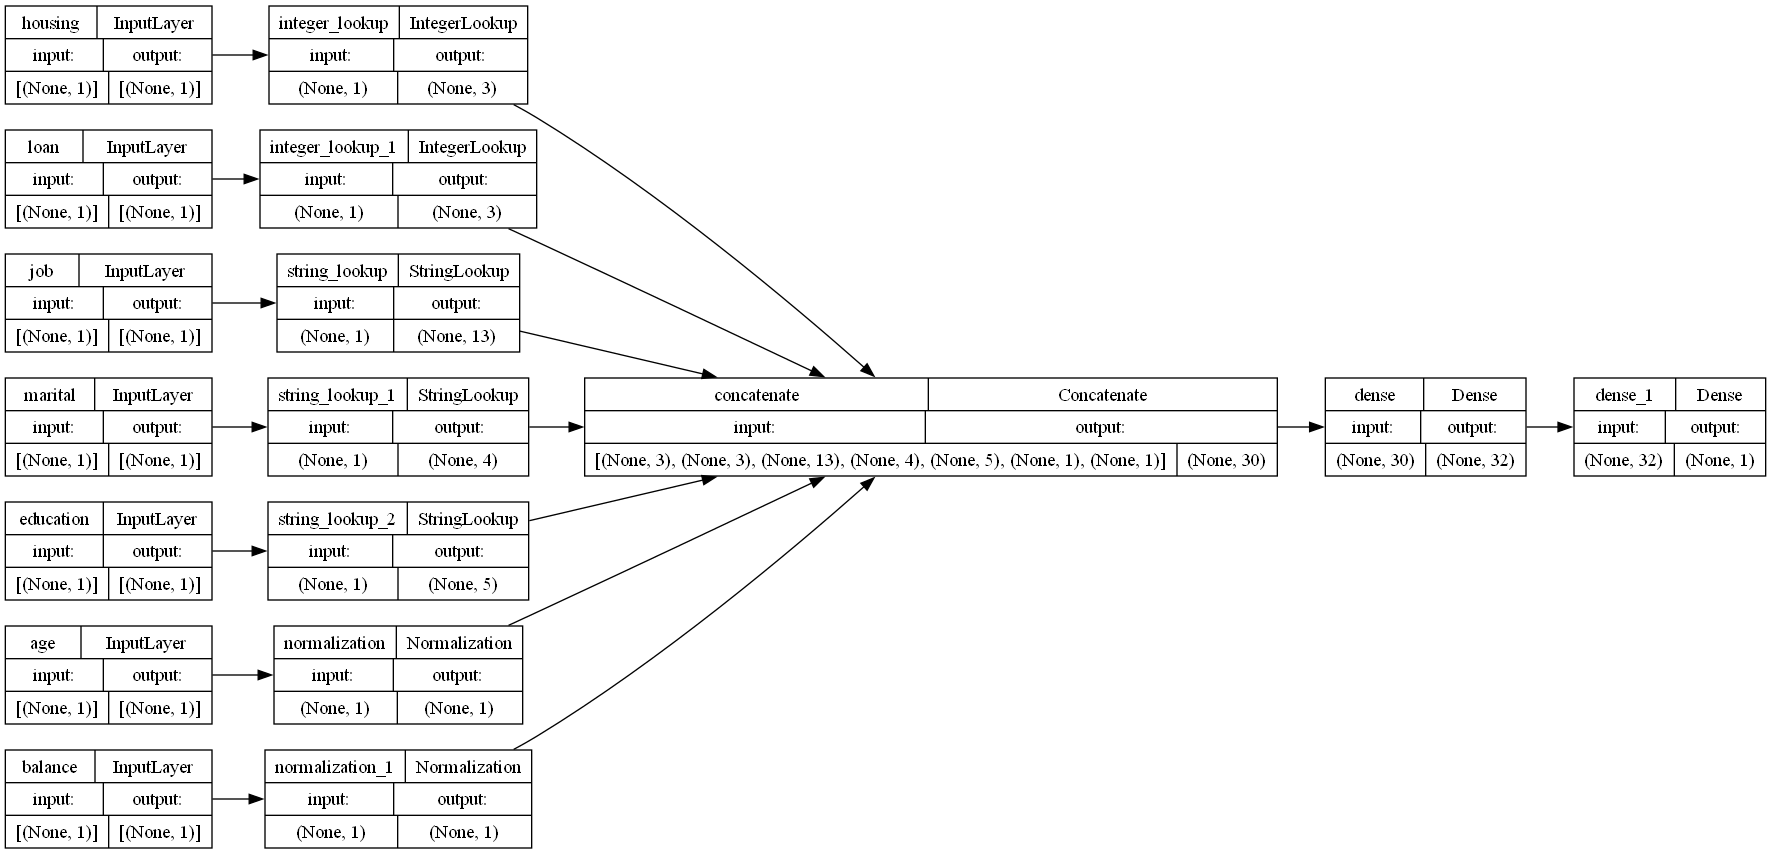

In [45]:
keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [46]:
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [47]:
model.fit(train_ds, epochs=50, validation_data=val_ds)

Epoch 1/50

905/905 [==============================] - 3s 2ms/step - loss: 0.3555 - accuracy: 0.8807 - val_loss: 0.3336 - val_accuracy: 0.8879
Epoch 2/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3409 - accuracy: 0.8820 - val_loss: 0.3307 - val_accuracy: 0.8880
Epoch 3/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3393 - accuracy: 0.8820 - val_loss: 0.3293 - val_accuracy: 0.8880
Epoch 4/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3384 - accuracy: 0.8821 - val_loss: 0.3290 - val_accuracy: 0.8873
Epoch 5/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3378 - accuracy: 0.8822 - val_loss: 0.3289 - val_accuracy: 0.8871
Epoch 6/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3368 - accuracy: 0.8822 - val_loss: 0.3286 - val_accuracy: 0.8875
Epoch 7/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3365 - accuracy: 0.8819 - val_loss: 0.3303 - val_accuracy: 0.8869
Epoch

Epoch 1/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3311 - accuracy: 0.8815 - val_loss: 0.3287 - val_accuracy: 0.8869
Epoch 2/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3311 - accuracy: 0.8809 - val_loss: 0.3296 - val_accuracy: 0.8872
Epoch 3/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3309 - accuracy: 0.8812 - val_loss: 0.3294 - val_accuracy: 0.8868
Epoch 4/50
905/905 [==============================] - 2s 2ms/step - loss: 0.3306 - accuracy: 0.8814 - val_loss: 0.3280 - val_accuracy: 0.8869
Epoch 5/50
905/905 [==============================] - 2s 3ms/step - loss: 0.3309 - accuracy: 0.8812 - val_loss: 0.3302 - val_accuracy: 0.8872
Epoch 6/50
905/905 [==============================] - 3s 3ms/step - loss: 0.3311 - accuracy: 0.8811 - val_loss: 0.3288 - val_accuracy: 0.8871
Epoch 7/50
905/905 [==============================] - 3s 3ms/step - loss: 0.3306 - accuracy: 0.8814 - val_loss: 0.3294 - val_accuracy: 0.8878
Epoch 

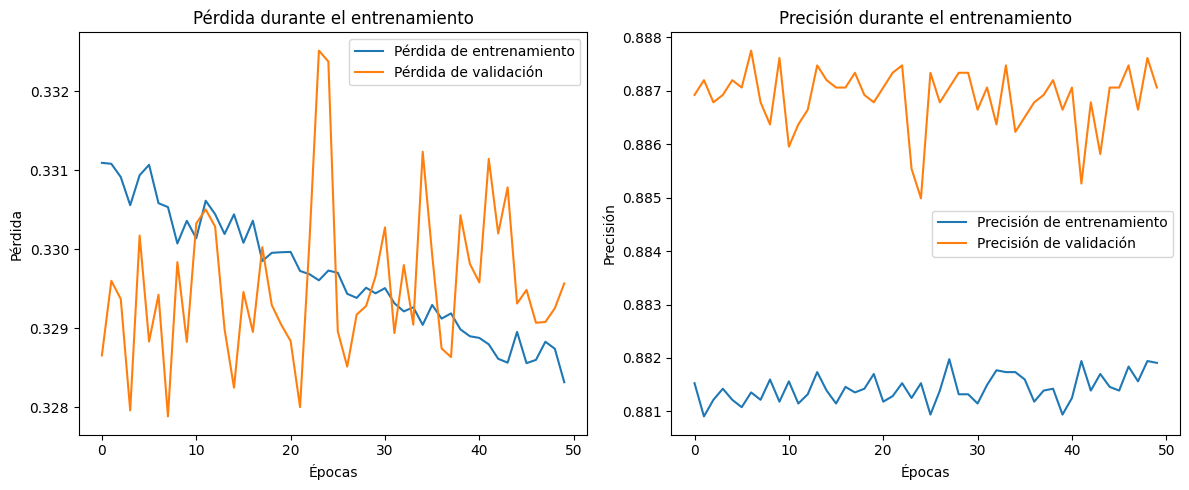

In [48]:
import matplotlib.pyplot as plt

# Suponiendo que has guardado el historial del entrenamiento
history = model.fit(train_ds, epochs=50, validation_data=val_ds)

# Graficar pérdida (loss)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

# Graficar precisión (accuracy)
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Precisión de entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()

Ejemplo de Prediccion

In [49]:
# Suponiendo que estos son los nuevos datos (df_new), deben tener las mismas columnas que tus datos de entrenamiento
data_nueva = {
    'housing': [1, 0],        # Ejemplo de nuevos clientes (1 tiene housing, 0 no tiene housing)
    'loan': [0, 1],           # Si tienen o no un préstamo
    'job': ['blue-collar', 'technician'],   # Profesión
    'marital': ['married', 'single'],       # Estado civil
    'education': ['secondary', 'tertiary'], # Nivel educativo
    'age': [40, 30],          # Edad de las personas
    'balance': [1200, 500],
    'y': [0,0]   # nos inventamos cualquier valor de y para que funcione el codigo anterior sin influir la prediccion
}


In [50]:
def predecir(p_housing, p_loan, p_job,p_marital, p_education,p_age, p_balance):
    
    data_nueva = {
    'housing': [p_housing],        # Ejemplo de nuevos clientes (1 tiene housing, 0 no tiene housing)
    'loan': [p_loan],           # Si tienen o no un préstamo
    'job': [p_job],   # Profesión
    'marital': [p_marital],       # Estado civil
    'education': [p_education], # Nivel educativo
    'age': [p_age],          # Edad de las personas
    'balance': [p_balance],
    'y': [0]   # nos inventamos cualquier valor de y para que funcione el codigo anterior sin influir la prediccion
    }
    
    
    df_new = pd.DataFrame(data_nueva)

    prueba_ds = dataframe_to_dataset(df_new)

    prueba_ds = prueba_ds.batch(batch_size)

    predicciones = model.predict(prueba_ds)
    
    return predicciones

In [51]:
print(predecir(1,1,'technician','single','secondary',40,1200))

1/1 [==============================] - 0s 181ms/step
[[0.04670686]]
